# Data Preparation

In this tutorial, you will learn how to prepare data sets with QSPRPred.

## Data Representation (`PandasDataSet`)

The package basically uses wrapped `pandas.DataFrame` objects with some useful functions added on top to facilitate features relevant for QSPR modeling. The `PandasDataSet` class is the  base class of all data sets in QSPRPred. Wrapping a `pandas.DataFrame` is easy:

In [1]:
# load a sample data set on parkinson's disease
import pandas as pd

df = pd.read_table('data/parkinsons_pivot.tsv')
df

,SMILES,GABAAalpha,NMDA,P41594,Q13255,Q14643
0,Brc1cc(-c2nc(-c3ncccc3)no2)ccc1,NaN,NaN,6.93,NaN,NaN
1,Brc1ccc2c(c1)-c1ncnn1Cc1c(-c3cccs3)ncn-21,8.400000,NaN,NaN,NaN,NaN
2,Brc1ccc2c(c1)-c1nncn1Cc1c(I)ncn-21,8.110000,NaN,NaN,NaN,NaN
3,Brc1cccc(-c2cc(-c3ccccc3)nnc2)c1,8.013333,NaN,NaN,NaN,NaN
4,Brc1cccc(-c2cnnc(NCc3ccccc3)c2)c1,7.505000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6220,c1cnc(COc2nn3c(C4CCC4)nnc3c3c2cccc3)cc1,7.700000,NaN,NaN,NaN,NaN
6221,c1cnc(COc2nn3c(N4CCOCC4)nnc3c3c2C2CCC3CC2)cc1,6.000000,NaN,NaN,NaN,NaN
6222,c1cnc(N2CCc3c(cccc3)C2)cc1,NaN,6.12,NaN,NaN,NaN
6223,c1cnc(Oc2cccc(-n3nnc(-c4ncccc4)n3)c2)cc1,NaN,NaN,5.54,NaN,NaN


In [2]:
from qsprpred.data.data import PandasDataSet

ds = PandasDataSet(df=df, store_dir="data", name="parkinsons")
ds

You can query this data set directly for simple information like the number of samples:

In [3]:
len(ds)

6225

the saved properties/features:

In [4]:
ds.getProperties()

Index(['SMILES', 'GABAAalpha', 'NMDA', 'P41594', 'Q13255', 'Q14643', 'QSPRID'], dtype='object')

You can also do some operations on the data frame, like shuffle it:

In [5]:
ds.shuffle()

or drop some columns:

In [6]:
ds.removeProperty("Q14643")

However, you can always access the underlying data frame if more complex operations are needed:

In [7]:
df = ds.getDF()
df

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID
QSPRID,,,,,,
parkinsons_4594,N=c1ccc(-c2ccc(Cl)cc2)nn1CCCC(=O)O,6.550,NaN,NaN,NaN,parkinsons_4594
parkinsons_1264,CCOC(=O)c1cn(-c2ccccc2)c(-c2ccc(OC)cc2)n1,5.040,NaN,NaN,NaN,parkinsons_1264
parkinsons_700,CC12CC(=O)C3C(CCC4CC(O)CCC43C)C1CCC2=CC#N,6.374,NaN,NaN,NaN,parkinsons_700
parkinsons_3293,Cc1ccc(C(=O)N2CCc3c(C2)c2nc(-c4c(F)cccc4)cn2c(...,6.660,NaN,NaN,NaN,parkinsons_3293
parkinsons_915,CCCCCCc1cnnn1-c1c(Cl)cc(C(F)(F)F)cc1Cl,5.039,NaN,NaN,NaN,parkinsons_915
...,...,...,...,...,...,...
parkinsons_3665,Cc1csc(NC(=O)c2cc(Cl)cc(Oc3cncnc3)c2)n1,NaN,NaN,7.96,NaN,parkinsons_3665
parkinsons_3730,Cc1nc(C#Cc2cc(Cl)ccc2)nnc1,NaN,NaN,8.38,NaN,parkinsons_3730
parkinsons_2354,COc1cccc(C#Cc2nc(C)cn3cc(C(F)(F)F)cc23)c1,NaN,NaN,7.10,NaN,parkinsons_2354


It is always possible to wrap it again:

In [8]:
ds = PandasDataSet(df=df, store_dir="data", name="parkinsons")
ds

In [9]:
ds.getDF()

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID
QSPRID,,,,,,
parkinsons_0,N=c1ccc(-c2ccc(Cl)cc2)nn1CCCC(=O)O,6.550,NaN,NaN,NaN,parkinsons_0
parkinsons_1,CCOC(=O)c1cn(-c2ccccc2)c(-c2ccc(OC)cc2)n1,5.040,NaN,NaN,NaN,parkinsons_1
parkinsons_2,CC12CC(=O)C3C(CCC4CC(O)CCC43C)C1CCC2=CC#N,6.374,NaN,NaN,NaN,parkinsons_2
parkinsons_3,Cc1ccc(C(=O)N2CCc3c(C2)c2nc(-c4c(F)cccc4)cn2c(...,6.660,NaN,NaN,NaN,parkinsons_3
parkinsons_4,CCCCCCc1cnnn1-c1c(Cl)cc(C(F)(F)F)cc1Cl,5.039,NaN,NaN,NaN,parkinsons_4
...,...,...,...,...,...,...
parkinsons_6220,Cc1csc(NC(=O)c2cc(Cl)cc(Oc3cncnc3)c2)n1,NaN,NaN,7.96,NaN,parkinsons_6220
parkinsons_6221,Cc1nc(C#Cc2cc(Cl)ccc2)nnc1,NaN,NaN,8.38,NaN,parkinsons_6221
parkinsons_6222,COc1cccc(C#Cc2nc(C)cn3cc(C(F)(F)F)cc23)c1,NaN,NaN,7.10,NaN,parkinsons_6222


### Data Indexing

You might have noticed that when recreated again from a new data frame the "QSPRID" column was reset while the data still remained in the same order as after shuffling. This is because index gets automatically reset when a new `PandasDataSet` object is created. However, you can always set the index to a specific column when creating the data set:

In [10]:
ds.shuffle()
df = ds.getDF()
df

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID
QSPRID,,,,,,
parkinsons_836,CCc1c(Cl)cc2nc(O)c(O)nc2c1,NaN,5.850,NaN,NaN,parkinsons_836
parkinsons_70,COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c4)[N+]([O-])=N...,6.77,NaN,NaN,NaN,parkinsons_70
parkinsons_4516,Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1,9.66,NaN,NaN,NaN,parkinsons_4516
parkinsons_2176,CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2,NaN,NaN,5.921,NaN,parkinsons_2176
parkinsons_3597,Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1,NaN,NaN,5.510,NaN,parkinsons_3597
...,...,...,...,...,...,...
parkinsons_1967,O=c1[nH]c2c(cc(Cl)cc2)n2c(=O)c(-c3ccc(F)cc3)nn12,7.25,NaN,NaN,NaN,parkinsons_1967
parkinsons_3057,CCc1cccc(NC(=N)Nc2cc(CC)ccc2)c1,NaN,6.935,NaN,NaN,parkinsons_3057
parkinsons_4446,Cc1cn2cc(C(F)(F)F)cc2c(C#Cc2ccc(N(C)C)cc2)n1,NaN,NaN,4.800,NaN,parkinsons_4446


In [11]:
ds = PandasDataSet(df=df, store_dir="data", name="parkinsons", index_cols=["QSPRID"])
ds.getDF()

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID
QSPRID,,,,,,
parkinsons_836,CCc1c(Cl)cc2nc(O)c(O)nc2c1,NaN,5.850,NaN,NaN,parkinsons_836
parkinsons_70,COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c4)[N+]([O-])=N...,6.77,NaN,NaN,NaN,parkinsons_70
parkinsons_4516,Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1,9.66,NaN,NaN,NaN,parkinsons_4516
parkinsons_2176,CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2,NaN,NaN,5.921,NaN,parkinsons_2176
parkinsons_3597,Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1,NaN,NaN,5.510,NaN,parkinsons_3597
...,...,...,...,...,...,...
parkinsons_1967,O=c1[nH]c2c(cc(Cl)cc2)n2c(=O)c(-c3ccc(F)cc3)nn12,7.25,NaN,NaN,NaN,parkinsons_1967
parkinsons_3057,CCc1cccc(NC(=N)Nc2cc(CC)ccc2)c1,NaN,6.935,NaN,NaN,parkinsons_3057
parkinsons_4446,Cc1cn2cc(C(F)(F)F)cc2c(C#Cc2ccc(N(C)C)cc2)n1,NaN,NaN,4.800,NaN,parkinsons_4446


Being aware of the index will help you track down the compounds and associated data further down the line so get used to it. You can always reset the index to a custom column as well:

In [12]:
ds.setIndex(["SMILES"])
ds.getDF().index

Index(['CCc1c(Cl)cc2nc(O)c(O)nc2c1',
       'COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c4)[N+]([O-])=NC23)cccc1',
       'Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1',
       'CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2', 'Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1',
       'NC(CCCCCP(=O)(O)O)C(=O)O',
       'N#Cc1c(C2CC2)c2c(nc1-c1ccccc1)[nH]nc2-c1ccccc1',
       'COCC(NC(=O)c1nccs1)c1cc(Cl)c(Nc2ccc(C)nc2)nc1',
       'Cc1cc(C#Cc2cn(-c3ccccc3)c(C)n2)ccn1',
       'Cc1c(NC(=N)Nc2c(C)cc(N)cc2)ccc(N)c1',
       ...
       'COc1cc2c(cc1)-n1cnc(C)c1Cn1ncnc-21',
       'CCN1CCc2c(C1)sc(C#Cc1cccc(F)c1)n2',
       'Cc1cnc(NC(=O)c2nn(C)c(-c3ccc(F)cc3)c2C)s1',
       'O=C(c1nn2cc(Cl)cnc2c1)N1CCc2c(CC1)sc(O)n2',
       'OCc1ccc2CCC(NCCCc3ccccc3)CCc2c1',
       'O=c1[nH]c2c(cc(Cl)cc2)n2c(=O)c(-c3ccc(F)cc3)nn12',
       'CCc1cccc(NC(=N)Nc2cc(CC)ccc2)c1',
       'Cc1cn2cc(C(F)(F)F)cc2c(C#Cc2ccc(N(C)C)cc2)n1',
       'CC1CC(C(=O)N2CCc3c(C2)sc(C#Cc2cccc(F)c2)n3)C1',
       'O=C(COCc1ccccc1)N1CCN(c2ccccc2)CC1'],
      dtype='object', 

or even use multiple columns as index:

In [13]:
ds.setIndex(["SMILES", "QSPRID"])
ds.getDF().index

MultiIndex([(                             'CCc1c(Cl)cc2nc(O)c(O)nc2c1', ...),
            ('COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c4)[N+]([O-])=NC23)cccc1', ...),
            (           'Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1', ...),
            (                         'CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2', ...),
            (                        'Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1', ...),
            (                               'NC(CCCCCP(=O)(O)O)C(=O)O', ...),
            (         'N#Cc1c(C2CC2)c2c(nc1-c1ccccc1)[nH]nc2-c1ccccc1', ...),
            (          'COCC(NC(=O)c1nccs1)c1cc(Cl)c(Nc2ccc(C)nc2)nc1', ...),
            (                    'Cc1cc(C#Cc2cn(-c3ccccc3)c(C)n2)ccn1', ...),
            (                    'Cc1c(NC(=N)Nc2c(C)cc(N)cc2)ccc(N)c1', ...),
            ...
            (                     'COc1cc2c(cc1)-n1cnc(C)c1Cn1ncnc-21', ...),
            (                      'CCN1CCc2c(C1)sc(C#Cc1cccc(F)c1)n2', ...),
            (              'Cc1cnc(NC(=O)c2nn(C)

### Parallelization

The `PandasDataSet` class also provides a simple way to parallelize operations on the data frame. For example, you can easily apply a function to all rows of the data frame in parallel. All you need to do is initialize the `PandasDataSet` object with the number of CPUs you want to use:

In [14]:
ds = PandasDataSet(df=df, store_dir="data", name="parkinsons", index_cols=["QSPRID"], n_jobs=2)
df = ds.getDF()
df

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID
QSPRID,,,,,,
parkinsons_836,CCc1c(Cl)cc2nc(O)c(O)nc2c1,NaN,5.850,NaN,NaN,parkinsons_836
parkinsons_70,COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c4)[N+]([O-])=N...,6.77,NaN,NaN,NaN,parkinsons_70
parkinsons_4516,Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1,9.66,NaN,NaN,NaN,parkinsons_4516
parkinsons_2176,CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2,NaN,NaN,5.921,NaN,parkinsons_2176
parkinsons_3597,Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1,NaN,NaN,5.510,NaN,parkinsons_3597
...,...,...,...,...,...,...
parkinsons_1967,O=c1[nH]c2c(cc(Cl)cc2)n2c(=O)c(-c3ccc(F)cc3)nn12,7.25,NaN,NaN,NaN,parkinsons_1967
parkinsons_3057,CCc1cccc(NC(=N)Nc2cc(CC)ccc2)c1,NaN,6.935,NaN,NaN,parkinsons_3057
parkinsons_4446,Cc1cn2cc(C(F)(F)F)cc2c(C#Cc2ccc(N(C)C)cc2)n1,NaN,NaN,4.800,NaN,parkinsons_4446


Now, all operations that are parallelized will be done in parallel. One example is the `apply` method that allows you to apply a function over a subset of rows of the data frame:

In [15]:
import time

def add_one_slow(x):
    """ Emulate a slow function."""

    time.sleep(0.001) # 100ms delay

    return f"{x[1]}+{x[0]}" # simply concatenate the values from the two columns in our subset

now = time.perf_counter()
res = ds.apply(add_one_slow, subset=["SMILES", "QSPRID"], axis=1)
print(time.perf_counter() - now)

Parallel apply in progress for parkinsons.:   0%|          | 0/4 [00:00<?, ?it/s]

3.715435422000155


In [16]:
res

QSPRID
parkinsons_836             parkinsons_836+CCc1c(Cl)cc2nc(O)c(O)nc2c1
parkinsons_70      parkinsons_70+COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c...
parkinsons_4516    parkinsons_4516+Cn1ncnc1COc1nn2c(-c3c(F)cccc3F...
parkinsons_2176       parkinsons_2176+CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2
parkinsons_3597      parkinsons_3597+Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1
                                         ...                        
parkinsons_1967    parkinsons_1967+O=c1[nH]c2c(cc(Cl)cc2)n2c(=O)c...
parkinsons_3057      parkinsons_3057+CCc1cccc(NC(=N)Nc2cc(CC)ccc2)c1
parkinsons_4446    parkinsons_4446+Cc1cn2cc(C(F)(F)F)cc2c(C#Cc2cc...
parkinsons_4071    parkinsons_4071+CC1CC(C(=O)N2CCc3c(C2)sc(C#Cc2...
parkinsons_255     parkinsons_255+O=C(COCc1ccccc1)N1CCN(c2ccccc2)CC1
Length: 6225, dtype: object

Compare this with the time it takes to do the same thing with only one CPU:

In [17]:
ds.nJobs = 1
now = time.perf_counter()
ds.apply(add_one_slow, subset=["SMILES", "QSPRID"], axis=1)
print(time.perf_counter() - now)

6.986453019999317


### Saving and Loading

The `PandasDataSet` class also provides a simple way to save and load data sets. You can save the data set and any associated data to a directory. By default this is the current directory, but you can specify a different directory upon creation of the data set:

In [18]:
ds = PandasDataSet(df=df, store_dir="data", name="parkinsons_pandas", index_cols=["QSPRID"])
ds.save()

'data/parkinsons_pandas_df.pkl'

Reloading the data set is easy as well. We just use its name to initialize a new `PandasDataSet` object:

In [19]:
ds = PandasDataSet(name="parkinsons_pandas", store_dir="data")
ds.getDF()

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID
QSPRID,,,,,,
parkinsons_836,CCc1c(Cl)cc2nc(O)c(O)nc2c1,NaN,5.850,NaN,NaN,parkinsons_836
parkinsons_70,COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c4)[N+]([O-])=N...,6.77,NaN,NaN,NaN,parkinsons_70
parkinsons_4516,Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1,9.66,NaN,NaN,NaN,parkinsons_4516
parkinsons_2176,CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2,NaN,NaN,5.921,NaN,parkinsons_2176
parkinsons_3597,Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1,NaN,NaN,5.510,NaN,parkinsons_3597
...,...,...,...,...,...,...
parkinsons_1967,O=c1[nH]c2c(cc(Cl)cc2)n2c(=O)c(-c3ccc(F)cc3)nn12,7.25,NaN,NaN,NaN,parkinsons_1967
parkinsons_3057,CCc1cccc(NC(=N)Nc2cc(CC)ccc2)c1,NaN,6.935,NaN,NaN,parkinsons_3057
parkinsons_4446,Cc1cn2cc(C(F)(F)F)cc2c(C#Cc2ccc(N(C)C)cc2)n1,NaN,NaN,4.800,NaN,parkinsons_4446


## Data Representation (`MoleculeTable`)

Next extension of the `PandasDataSet` class is the `MoleculeTable` class. While `PandasDataSet` is a completely general class that can be used for any data set, `MoleculeTable` is specifically designed for data sets that contain molecular structures. It is a subclass of `PandasDataSet` and adds some useful functions for molecules. For example, you can easily convert the SMILES strings to RDKit molecules in your table:

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID,RDMol
QSPRID,,,,,,,
parkinsons_0,CCc1c(Cl)cc2nc(O)c(O)nc2c1,NaN,5.850,NaN,NaN,parkinsons_0,
parkinsons_1,COc1c(OC(=O)CC2C=NN3c4c(ccc(Cl)c4)[N+]([O-])=N...,6.77,NaN,NaN,NaN,parkinsons_1,
parkinsons_2,Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1,9.66,NaN,NaN,NaN,parkinsons_2,
parkinsons_3,CCN1CCc2c(C1)sc(C#Cc1ccccc1)n2,NaN,NaN,5.921,NaN,parkinsons_3,
parkinsons_4,Cc1cnc(NC(=O)NC2=NC(=O)CN2C)cc1,NaN,NaN,5.510,NaN,parkinsons_4,
...,...,...,...,...,...,...,...
parkinsons_6220,O=c1[nH]c2c(cc(Cl)cc2)n2c(=O)c(-c3ccc(F)cc3)nn12,7.25,NaN,NaN,NaN,parkinsons_6220,
parkinsons_6221,CCc1cccc(NC(=N)Nc2cc(CC)ccc2)c1,NaN,6.935,NaN,NaN,parkinsons_6221,
parkinsons_6222,Cc1cn2cc(C(F)(F)F)cc2c(C#Cc2ccc(N(C)C)cc2)n1,NaN,NaN,4.800,NaN,parkinsons_6222,

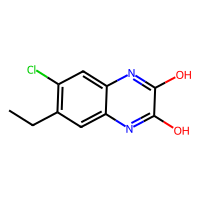
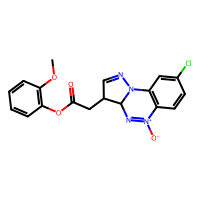
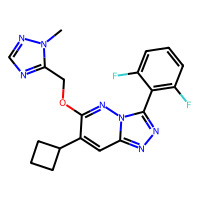
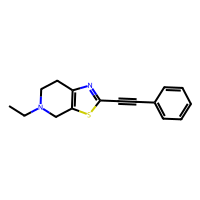
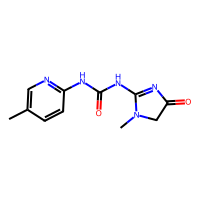
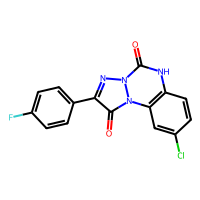
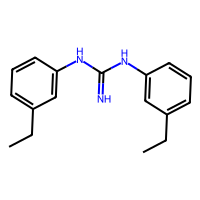
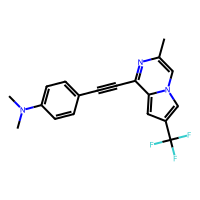
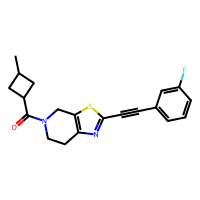
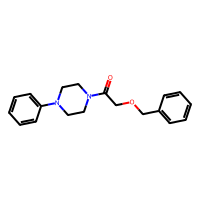

In [20]:
from qsprpred.data.data import MoleculeTable

mt = MoleculeTable(df=df, store_dir="data", name="parkinsons", add_rdkit=True)
mt.getDF()

However, in addition to the ability to depict structures in Jupyter notebooks, this also allows you to use the `MoleculeTable` class to calculate molecular descriptors and fingerprints, determine scaffolds and standardize structures. We will go over some of these features in the next sections.

### Dropping Invalid Molecules and Standardizing Structures

Before making calculations, it is a good idea to standardize structures and drop invalid molecules. `MoleculeTable` provides a simple way to do this:

In [21]:
mt.standardizeSmiles('chembl', drop_invalid=True)

The code above uses the ChEMBL standardizer to standardize the structures and drops all invalid molecules. You can also do it separately, though:

In [22]:
mt.standardizeSmiles('chembl', drop_invalid=False)
mt.dropInvalids() # returns a boolean array of the same length as the unfiltered data frame that indicates which rows were dropped (True) and which were kept (False)

QSPRID
parkinsons_0       False
parkinsons_1       False
parkinsons_2       False
parkinsons_3       False
parkinsons_4       False
                   ...  
parkinsons_6220    False
parkinsons_6221    False
parkinsons_6222    False
parkinsons_6223    False
parkinsons_6224    False
Name: SMILES, Length: 6225, dtype: bool

### Calculating Molecular Descriptors

QSPRPred provides an interface to easily calculate molecular descriptors. The package already contains many descriptor implementations, but you can also easily add your own. Here is an example that calculates Morgan fingerprints and RDKit descriptors:

In [23]:
from qsprpred.data.utils.descriptorsets import rdkit_descs, FingerprintSet
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator

calc = MoleculeDescriptorsCalculator(descsets=[FingerprintSet("MorganFP", radius=3, nBits=2048), rdkit_descs()])
mt.addDescriptors(calc)

**Note:** You can also speed these calculations up with the `n_jobs`/`nJobs` parameter/attribute since descriptor calculation is implemented to process multiple sets of molecules in parallel if `mt.nJobs` is higher than 1.

Descriptors are saved in their own wrapped tables, which can be accessed with the `descriptors` attribute:

In [24]:
mt.descriptors

In [25]:
mt.descriptors[0].getDF().shape

(6225, 2257)

Adding more descriptors (i.e. [protein descriptors](data_preparation_advanced.ipynb)) later will append to this list. You can easily get the whole matrix of descriptors as follows:

In [26]:
mt.getDescriptors()

,Descriptor_FingerprintSet_MorganFP_0,Descriptor_FingerprintSet_MorganFP_1,Descriptor_FingerprintSet_MorganFP_2,Descriptor_FingerprintSet_MorganFP_3,Descriptor_FingerprintSet_MorganFP_4,Descriptor_FingerprintSet_MorganFP_5,Descriptor_FingerprintSet_MorganFP_6,Descriptor_FingerprintSet_MorganFP_7,Descriptor_FingerprintSet_MorganFP_8,Descriptor_FingerprintSet_MorganFP_9,...,Descriptor_RDkit_fr_sulfide,Descriptor_RDkit_fr_sulfonamd,Descriptor_RDkit_fr_sulfone,Descriptor_RDkit_fr_term_acetylene,Descriptor_RDkit_fr_tetrazole,Descriptor_RDkit_fr_thiazole,Descriptor_RDkit_fr_thiocyan,Descriptor_RDkit_fr_thiophene,Descriptor_RDkit_fr_unbrch_alkane,Descriptor_RDkit_fr_urea
QSPRID,,,,,,,,,,,,,,,,,,,,,
parkinsons_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
parkinsons_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
parkinsons_6220,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_6221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_6222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Representation (`QSPRDataset`)

The `QSPRDataset` class is the next extension of the `PandasDataSet` and `MoleculeTable` classes. It is a subclass of `MoleculeTable` and adds some useful functions for QSPR model training itself. You can create a `QSPRDataset` object from scratch as usual, but this time you will need to specify the target properties and tasks you would like to model. For example, a data set for a simple regression task would be defined as follows:

,SMILES,GABAAalpha,NMDA,P41594,Q13255,QSPRID,RDMol
QSPRID,,,,,,,
parkinsons_0,COc1ccccc1OC(=O)CC1C=NN2c3cc(Cl)ccc3[N+]([O-])...,6.77000,NaN,NaN,NaN,parkinsons_0,
parkinsons_1,Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1,9.66000,NaN,NaN,NaN,parkinsons_1,
parkinsons_2,Cc1cc(C#Cc2cn(-c3ccccc3)c(C)n2)ccn1,5.50000,NaN,7.72,NaN,parkinsons_2,
parkinsons_3,CCOC(=O)c1cn(-c2ccc(Cl)cc2Cl)c(-c2ccc(I)cc2)n1,6.35000,NaN,NaN,NaN,parkinsons_3,
parkinsons_4,CN1Cc2c(C#Cc3ccccc3)ncn2-c2cccc(Cl)c2C1=O,9.00000,NaN,5.95,NaN,parkinsons_4,
...,...,...,...,...,...,...,...
parkinsons_2045,Cc1onc(-c2ccccc2)c1COc1ccc(C(=O)NCC2CCCOC2)cn1,7.93000,NaN,NaN,NaN,parkinsons_2045,
parkinsons_2046,CC(C)Sc1sc(-c2cc[nH]n2)c2c1C(=O)CC(C)(C)C2,8.26750,NaN,NaN,NaN,parkinsons_2046,
parkinsons_2047,CC1(C)CC(=O)c2c(NCCO)sc(-c3cc[nH]n3)c2C1,6.66975,NaN,NaN,NaN,parkinsons_2047,

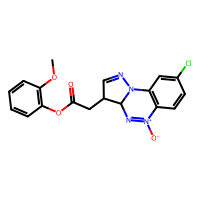
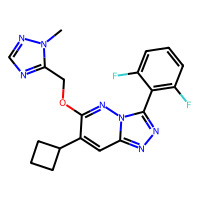
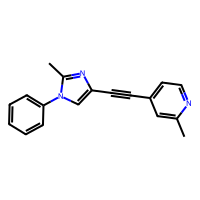
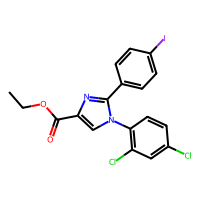
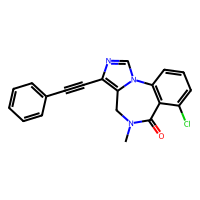
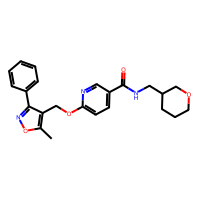
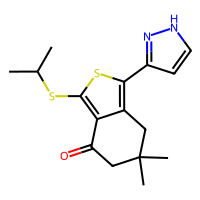
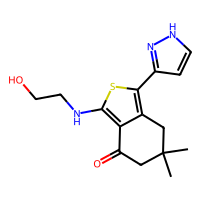
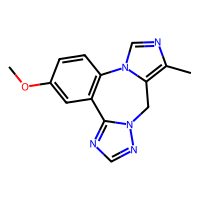
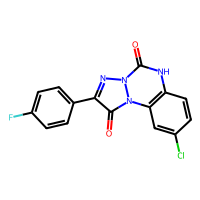

In [27]:
from qsprpred.models.tasks import TargetTasks
from qsprpred.data.data import QSPRDataset, TargetProperty

ds_qspr = QSPRDataset(df=df, store_dir="data", name="parkinsons", target_props=[{"name": "GABAAalpha", "task": TargetTasks.REGRESSION}])
# or
ds_qspr = QSPRDataset(df=df, store_dir="data", name="parkinsons", target_props=[TargetProperty("GABAAalpha", TargetTasks.REGRESSION)])
ds_qspr.getDF()

You can see that some rows from the original data frame were dropped automatically because they did not have a value for the specified `GABAAalpha` target property.

You may also notice that in this data set we are now missing our descriptors:

In [28]:
ds_qspr.descriptors

[]

In [29]:
ds_qspr.getDescriptors()

""
QSPRID
parkinsons_0
parkinsons_1
parkinsons_2
parkinsons_3
parkinsons_4
...
parkinsons_2045
parkinsons_2046
parkinsons_2047


This is because the `QSPRDataset` class does not know anything about the descriptors in our `MoleculeTable` object since it only uses the original data frame with the molecules and target properties. Therefore, there is also the `fromMolTable` method that allows you to create a `QSPRDataset` object from a `MoleculeTable` object while maintaining all data associated with it:

In [30]:
ds_qspr = QSPRDataset.fromMolTable(mt, target_props=[TargetProperty("GABAAalpha", TargetTasks.REGRESSION)])
ds_qspr.descriptors

In [31]:
ds_qspr.getDescriptors()

,Descriptor_FingerprintSet_MorganFP_0,Descriptor_FingerprintSet_MorganFP_1,Descriptor_FingerprintSet_MorganFP_2,Descriptor_FingerprintSet_MorganFP_3,Descriptor_FingerprintSet_MorganFP_4,Descriptor_FingerprintSet_MorganFP_5,Descriptor_FingerprintSet_MorganFP_6,Descriptor_FingerprintSet_MorganFP_7,Descriptor_FingerprintSet_MorganFP_8,Descriptor_FingerprintSet_MorganFP_9,...,Descriptor_RDkit_fr_sulfide,Descriptor_RDkit_fr_sulfonamd,Descriptor_RDkit_fr_sulfone,Descriptor_RDkit_fr_term_acetylene,Descriptor_RDkit_fr_tetrazole,Descriptor_RDkit_fr_thiazole,Descriptor_RDkit_fr_thiocyan,Descriptor_RDkit_fr_thiophene,Descriptor_RDkit_fr_unbrch_alkane,Descriptor_RDkit_fr_urea
QSPRID,,,,,,,,,,,,,,,,,,,,,
parkinsons_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
parkinsons_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
parkinsons_2045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parkinsons_2046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
parkinsons_2047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


At this point, this data set is ready to be used for machine learning, which will be addressed in the [following tutorial](tutorial_training.ipynb). More advanced features like interfacing with the [Papyrus data set](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-022-00672-x), calculating protein descriptors or adding your own descriptors are covered in the [Advanced Data Preparation](data_preparation_advanced.ipynb) notebook.